#### Linear Regression

In [1]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Load the latest version of the dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shree1992/housedata",
  'data.csv',
)

d:\Projects\DS_BootCamp\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\hp\AppData\Local\Temp\ipykernel_15564\2843193704.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [2]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [3]:
df.tail(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4597,2014-07-09 00:00:00,416904.166667,3.0,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.5,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


#### Checking unique values

In [4]:
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['condition'].unique())

[0 1]
[0 4 1 2 3]
[3 5 4 2 1]


#### Checking if any features has null value then add them

In [5]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#### Counting unique values

In [6]:
print(df['waterfront'].value_counts())
print(df['condition'].value_counts())
print(df['view'].value_counts())

waterfront
0    4567
1      33
Name: count, dtype: int64
condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64
view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64


#### Seeing all columns

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### Checking unique in city column

In [9]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

#### Dropping unnecessary features

In [10]:
df.drop(columns=['country','date'], inplace=True)

#### Dropping row if null values found

In [11]:
df = df.dropna()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178


#### Handle outliers using IQR method
#### Use IQR only with continous data(price, bathrooms) not catogorical data(year, zipcode)

In [12]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # below these give a range which will considered as data and rest will be considered as outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within the IQR range for this column
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

#### Select features and prepare data

In [13]:
numerical_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
categorical_cols = ['street', 'city', 'statezip']

# Remove outliers from numerical columns
df_cleaned = remove_outliers(df, numerical_cols + ['price'])

# Prepare X and y
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned['price']

In [14]:
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115


In [15]:
df_cleaned.shape

(3800, 16)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3800 non-null   float64
 1   bedrooms       3800 non-null   float64
 2   bathrooms      3800 non-null   float64
 3   sqft_living    3800 non-null   int64  
 4   sqft_lot       3800 non-null   int64  
 5   floors         3800 non-null   float64
 6   waterfront     3800 non-null   int64  
 7   view           3800 non-null   int64  
 8   condition      3800 non-null   int64  
 9   sqft_above     3800 non-null   int64  
 10  sqft_basement  3800 non-null   int64  
 11  yr_built       3800 non-null   int64  
 12  yr_renovated   3800 non-null   int64  
 13  street         3800 non-null   object 
 14  city           3800 non-null   object 
 15  statezip       3800 non-null   object 
dtypes: float64(4), int64(9), object(3)
memory usage: 504.7+ KB


In [17]:
df_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip'],
      dtype='object')

#### Making data for labelling and Scaling

In [18]:
label_columns = ['street', 'city', 'statezip']
scale_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']

#### First Label Encode the object type columns

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

for col in label_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

df_cleaned[label_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 0 to 4599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   street    3800 non-null   int64
 1   city      3800 non-null   int64
 2   statezip  3800 non-null   int64
dtypes: int64(3)
memory usage: 118.8 KB


#### Now lets Scale the dataset

In [20]:
sc = StandardScaler()

for col in scale_columns:
    if col not in label_columns:
        df_cleaned[col] = sc.fit_transform(df_cleaned[col].values.reshape(-1, 1))

In [21]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3800.0,1.551975e-16,1.000132,-2.223280,-0.756545,-0.152595,0.585235,3.250945
bedrooms,3800.0,1.608070e-16,1.000132,-3.798717,-0.361237,-0.361237,0.784590,6.513723
bathrooms,3800.0,1.196704e-16,1.000132,-2.959304,-0.791176,-0.068467,0.654242,5.351851
sqft_living,3800.0,7.479397e-17,1.000132,-2.222719,-0.762706,-0.104269,0.654366,3.331057
sqft_lot,3800.0,8.227337e-17,1.000132,-1.811921,-0.683678,-0.024247,0.564734,3.470079
floors,3800.0,-5.609548e-17,1.000132,-0.902666,-0.902666,0.017433,0.937533,3.697830
waterfront,3800.0,7.479397e-18,1.000132,-0.045932,-0.045932,-0.045932,-0.045932,21.771541
view,3800.0,1.215402e-17,1.000132,-0.251987,-0.251987,-0.251987,-0.251987,6.527127
condition,3800.0,-1.224751e-16,1.000132,-3.646081,-0.672882,-0.672882,0.813718,2.300317
sqft_above,3800.0,-1.458482e-16,1.000132,-1.903568,-0.761494,-0.272034,0.588229,3.421165


#### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

# drop the target variable 'price' from the features and add it to the target variable
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training on Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.7517410976692787
MAE: 0.5718370405725157
R2: 0.4169917196987114


## XgBoost Regressor

In [26]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [27]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE: {rmse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"R2: {r2_xgb}")

RMSE: 0.5460659888489515
MAE: 0.3738912541795265
R2: 0.6923702085727605


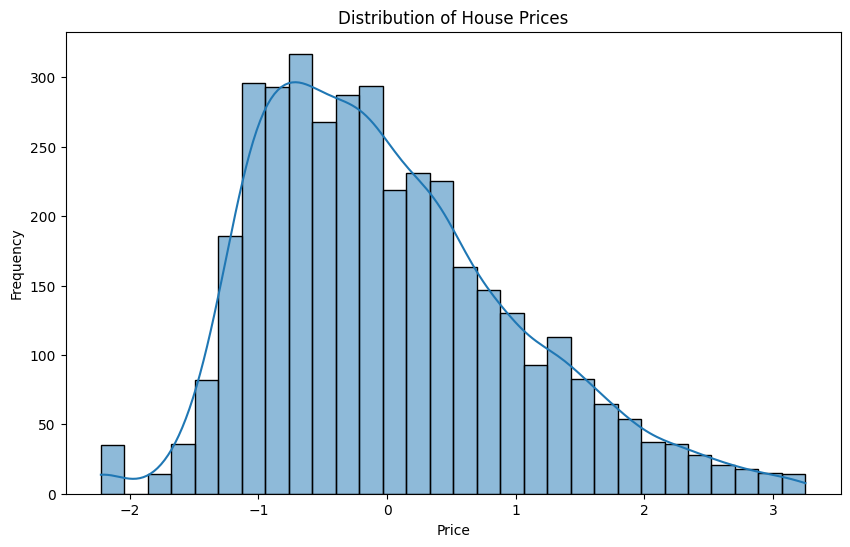

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Compare the house pricing vs prediction on test set with price and bedrroms for simple linear regression

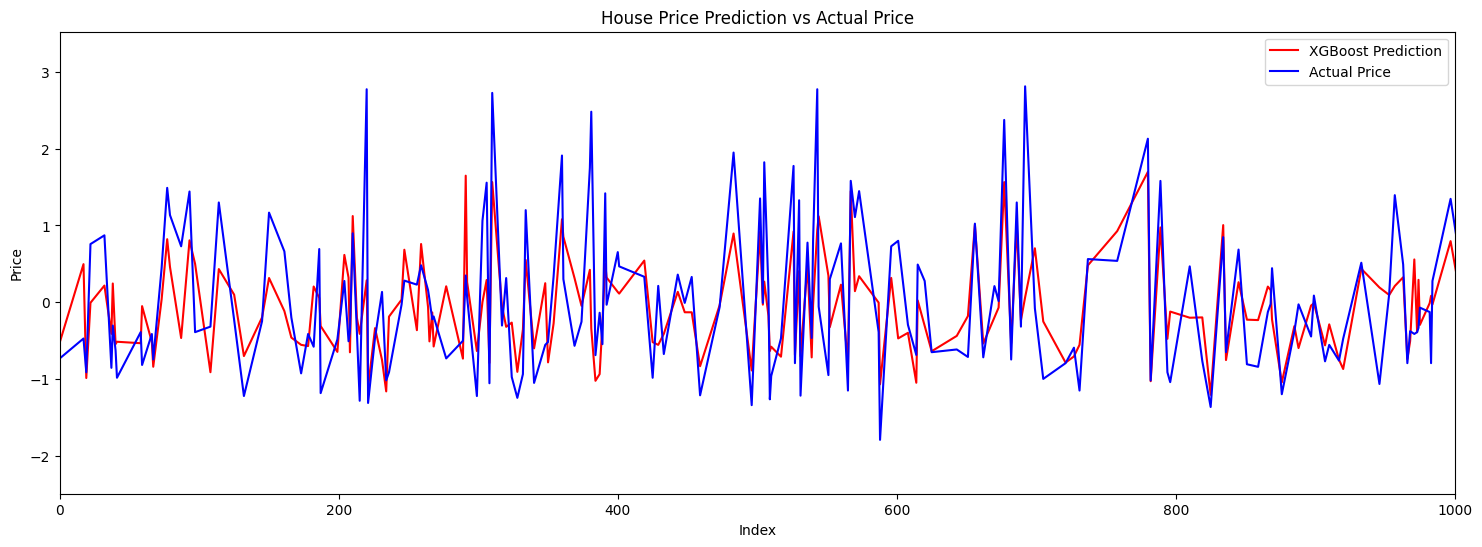

In [29]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=y_test.index, y=y_pred, color='red', label='XGBoost Prediction')
sns.lineplot(x=y_test.index, y=y_test, color='blue', label='Actual Price')
plt.title('House Price Prediction vs Actual Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.xlim(0, 1000)
plt.show()


#### Compare the house pricing vs prediction on test set with price and bedrroms for Xgboost regression

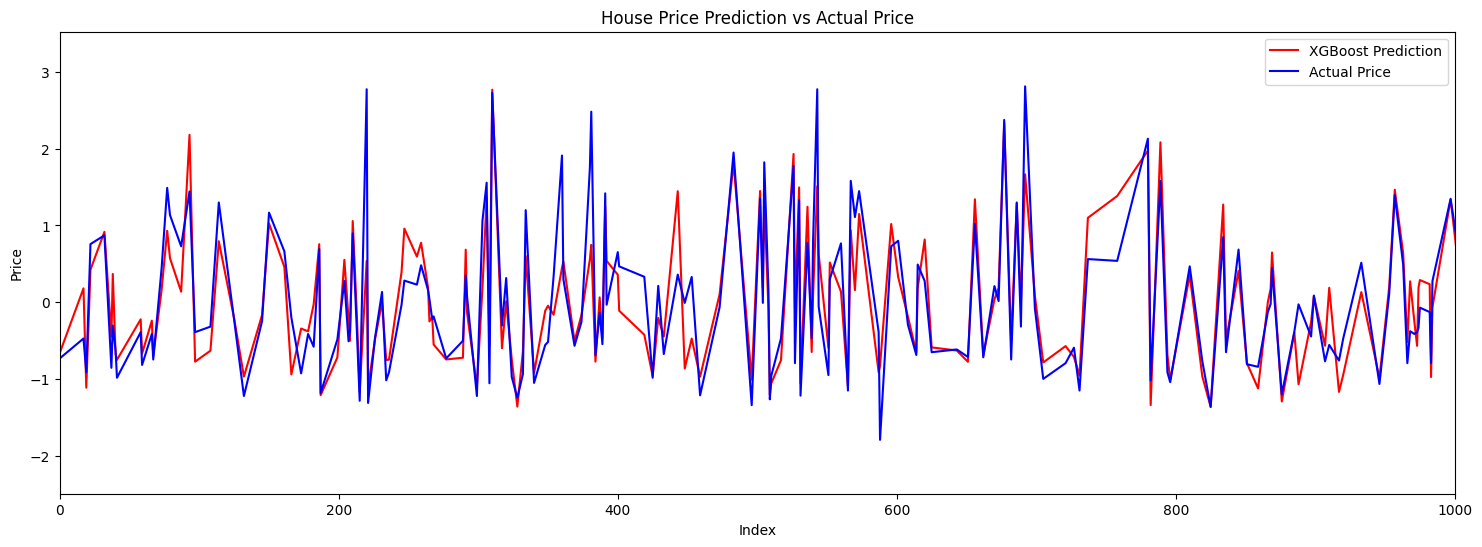

In [30]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=y_test.index, y=y_pred_xgb, color='red', label='XGBoost Prediction')
sns.lineplot(x=y_test.index, y=y_test, color='blue', label='Actual Price')
plt.title('House Price Prediction vs Actual Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.xlim(0, 1000)
plt.show()


## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
cost = (y_test - y_pred_rf) ** 2
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R2: {r2_rf}")
print(f"Cost: {cost.mean()}")

RMSE: 0.558465026326705
MAE: 0.38894116608388235
R2: 0.6782414493696574
Cost: 0.3118831856300874


## Linear Regression

#### For logistic regression we are making our data to perform classification

In [38]:
# Make new column expensive and assign True or False based on the price
df_cleaned['expensive'] = df_cleaned['price'] > 0
df_cleaned['expensive'].unique()

array([False,  True])

#### removing price and expensive and add expensive as target variable

In [40]:
X = df_cleaned.drop(columns=['price', 'expensive'])
y = df_cleaned['expensive']

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
score = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
print(f"Accuracy: {score}")
print(f"Classification Report:{report}")


Accuracy: 0.755
Classification Report:              precision    recall  f1-score   support

       False       0.76      0.82      0.79      2148
        True       0.74      0.67      0.70      1652

    accuracy                           0.76      3800
   macro avg       0.75      0.75      0.75      3800
weighted avg       0.75      0.76      0.75      3800



d:\Projects\DS_BootCamp\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
